# Linear Regression in Python

1. Solves the Linear Regression problem.
2. Uses Python Class to efficiently implement Linear Regression 

In [1]:
#%% Importing Libraries
import numpy as np
import matplotlib.pyplot as plt

#%% Setting random seed
np.random.seed(10)

In [2]:
#%% Build model

class LinearRegression():
    r"""
    Linear Regression class
    """
    def __init__(self, slope, intercept, lr):
        self.slope = slope
        self.intercept = intercept
        self.lr = lr
        self.train = True
        
    def predict(self, data):
        r""" 
        Predicts output given input data
        """
        out = np.dot(self.slope, data.T) + self.intercept
        self.d = data
        return out.T
    
    def MSEloss(self,predicted, true):
        r"""
        Calculates MSE loss and also calculates gradients of slope, intercept
        """
        error = predicted - true
        loss = (error**2).mean()
        
        if self.train == True:
            # Gradients calculated only during training
            self.slope_grad =  2 * (self.d * error).mean()
            self.intercept_grad = 2 * error.mean()
        
        return loss
    
    def set_mode(self, mode):
        if mode == 'train':
            self.train = True
        elif mode == 'eval':
            self.train = False
        
    def update(self):
        r"""
        Updates parameters and makes gradients zero after update
        """
        self.slope -= self.lr * self.slope_grad
        self.intercept -= self.lr * self.intercept_grad
        
        self.slope_grad = 0
        self.intercept_grad = 0


In [3]:
#%% Generate Data
# Generate Random data
x = np.random.randn(100,1)

# Generate random noise [same shape as input]
noise = np.random.randn(100,1)

# Generate true outputs
# ( y = mx + c)
y_true = 3 * x + 2 + 0.2 * noise 

In [4]:
#%% Training and Validation split

shuffle_idx = np.random.permutation(x.size)

x_train, y_train = x[shuffle_idx[:80]], y_true[shuffle_idx[:80]]
x_valid, y_valid = x[shuffle_idx[80:]], y_true[shuffle_idx[80:]] 

In [5]:
#%% Initiate model
slope = np.random.rand(1,1)
intercept = np.random.rand(1,1)

model = LinearRegression(slope= slope,intercept= intercept, lr= 0.01)

In [6]:
print('\nBefore Training ')
print('Slope : ', model.slope)
print('Intercept : ', model.intercept)
print('\n')


Before Training 
Slope :  [[0.52885388]]
Intercept :  [[0.69630827]]




In [7]:
#%% Start training

losses = np.array([])

model.set_mode('train')

for i in range(1000):
    
    y_pred = model.predict(x_train)
    
    loss = model.MSEloss(y_pred, y_train)
    losses = np.append(losses, loss)
        
    model.update()
    
    if i % 100 == 0:
        print('Epoch : {:d}, Loss : {:.4f}'.format(i,loss))

Epoch : 0, Loss : 7.0509
Epoch : 100, Loss : 0.2346
Epoch : 200, Loss : 0.0445
Epoch : 300, Loss : 0.0377
Epoch : 400, Loss : 0.0374
Epoch : 500, Loss : 0.0374
Epoch : 600, Loss : 0.0374
Epoch : 700, Loss : 0.0374
Epoch : 800, Loss : 0.0374
Epoch : 900, Loss : 0.0374


In [8]:
print('\nAfter Training ')
print('Slope : ', model.slope)
print('Intercept : ', model.intercept)


After Training 
Slope :  [[2.99183031]]
Intercept :  [[2.01103361]]


In [9]:
#%% Test performance

model.set_mode('eval')

y = model.predict(x_valid)
loss = model.MSEloss(y, y_valid)

print('\nLoss on Validation set : {:.4f}'.format(loss))


Loss on Validation set : 0.0458


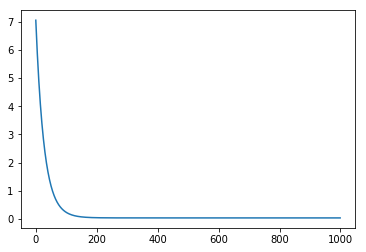

In [10]:
# Loss
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(losses.size),losses)

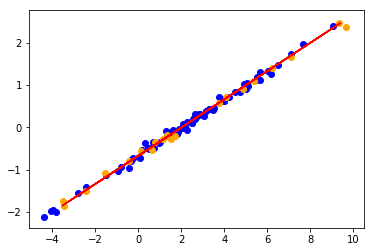

In [11]:
# Regression Line
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.scatter(y_train, x_train, c = 'blue')
ax2.scatter(y_valid, x_valid, c ='orange')
ax2.plot(y,x_valid, c = 'red')